## Задание:

1. Построить сетевой график для максимальной (tпес) продолжительности всех его работ, рассчитать наиболее ранние и наиболее поздние сроки наступления событий, найти критический путь, определить полные и независимые резервы времени всех работ и коэффициенты напряженности некритических дуг.

2. Для трехпараметрической модели найти ожидаемое время выолнения проекта, определить вероятность выполнения проекта не позднее заданного срока, найти интервал гарантированного (с вероятностью Р = 0,9973) времени выполнения проекта, оценить максимально возможный срок выполнения проекта с заданной надежностью.
Выполнить те же расчеты для двухпараметрической модели. Сравнить результаты.

3. Считая tпес продолжительностью работы с минимальной допустимой интенсивностью (tпес = tmax), а tопт – продолжительностью работы с максимальной возможной интенсивностью (tопт = tmin), найти оптимальный по стоимости вариант выполнения проекта. Минимизировать стоимость проекта при минимально возможном сроке его исполнения.

Директивный (заданный) срок выполнения проекта Tдир = 28 дней. Заданная надежность γ = 0,90.
Стоимость одного дня проекта равна 10 денежным единицам: S = 10.

Таблица:


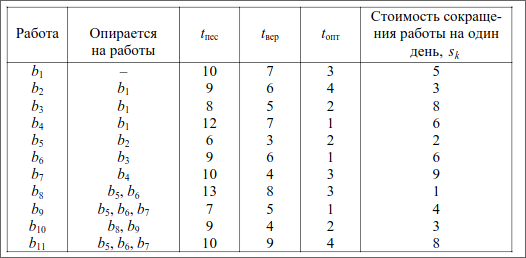

Наиболее ранние сроки наступления событий: {0: 0, 1: 10, 2: 22, 3: 18, 4: 19, 6: 32, 5: 27, 7: 40, 8: 49}
Наиболее поздние сроки наступления событий: {8: 49, 7: 40, 6: 33, 5: 27, 4: 21, 3: 18, 2: 23, 1: 10, 0: 0}
Критический путь: [0, 1, 3, 5, 7, 8]
Полные резервы времени: {(0, 1): 0, (1, 2): 1, (1, 3): 0, (1, 4): 2, (2, 6): 1, (3, 5): 0, (4, 5): 2, (6, 7): 1, (6, 8): 7, (5, 6): 6, (5, 7): 0, (7, 8): 0}
Независимые резервы времени: {(0, 1): 0, (1, 2): 0, (1, 3): 0, (1, 4): 0, (2, 6): 0, (3, 5): 0, (4, 5): 2, (6, 7): 1, (6, 8): 7, (5, 6): 5, (5, 7): 0, (7, 8): 0}
Коэффициенты напряженности некритических дуг: {(1, 2): 0.0, (1, 4): 0.0, (2, 6): 0.0, (4, 5): 1.0, (6, 7): 1.0, (6, 8): 1.0, (5, 6): 0.8333333333333334}


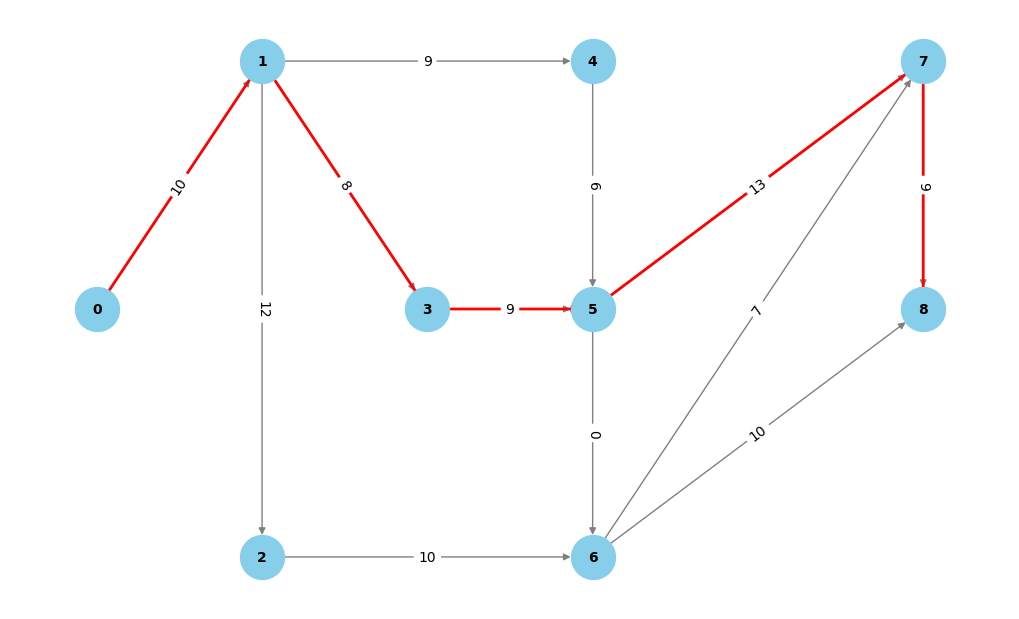

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем пустой граф
G = nx.DiGraph()

# Позиции узлов
pos = {0:(10, 40), 1:(15, 50), 2:(15, 30), 3:(20, 40), 4:(25, 50), 5:(25, 40), 6:(25, 30), 7:(35, 50), 8:(35, 40)}

# Ребра с весами
edges = [
    (0, 1, 10),
    (1, 2, 12), (1, 3, 8), (1, 4, 9),
    (2, 6, 10),
    (3, 5, 9),
    (4, 5, 6),
    (5, 6, 0),
    (5, 7, 13),
    (6, 7, 7),
    (7, 8, 9),
    (6, 8, 10)
]

G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, 'weight')

# Расчет ранних дат (forward pass)
earliest_start = {node: 0 for node in G.nodes}
for node in nx.topological_sort(G):
    for successor in G.successors(node):
        earliest_start[successor] = max(earliest_start[successor], earliest_start[node] + G[node][successor]['weight'])

# Расчет поздних дат (backward pass)
latest_finish = {node: float('inf') for node in G.nodes}
latest_finish[max(G.nodes)] = earliest_start[max(G.nodes)]
for node in reversed(list(nx.topological_sort(G))):
    for predecessor in G.predecessors(node):
        latest_finish[predecessor] = min(latest_finish[predecessor], latest_finish[node] - G[predecessor][node]['weight'])

# Критический путь
critical_path = []
for node in G.nodes:
    if earliest_start[node] == latest_finish[node]:
        critical_path.append(node)

# Резервы времени
total_float = {}
free_float = {}
for u, v in G.edges:
    total_float[(u, v)] = latest_finish[v] - earliest_start[u] - G[u][v]['weight']
    free_float[(u, v)] = earliest_start[v] - earliest_start[u] - G[u][v]['weight']

# Вывод результатов
print("Наиболее ранние сроки наступления событий:", earliest_start)
print("Наиболее поздние сроки наступления событий:", {k: latest_finish[k] for k in sorted(latest_finish.keys(), reverse=True)})
print("Критический путь:", critical_path)
print("Полные резервы времени:", total_float)
print("Независимые резервы времени:", free_float)

# Коэффициенты напряженности
tension_coefficients = {edge: free_float[edge] / total_float[edge] if total_float[edge] != 0 else float('inf') for edge in total_float}

print("Коэффициенты напряженности некритических дуг:", {k: v for k, v in tension_coefficients.items() if v != float('inf')})


# Рисуем граф с выделением критического пути
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black', edge_color='gray', font_weight='bold')

# Рисуем ребра красным, если они принадлежат критическому пути
for u, v in G.edges:
    if u in critical_path and v in critical_path:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2.0, edge_color='red')

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

Наиболее ранние сроки наступления событий: {0: 0, 1: 10, 2: 22, 3: 18, 4: 19, 6: 32, 5: 27, 7: 40, 8: 49}
Наиболее поздние сроки наступления событий: {8: 49, 7: 40, 6: 33, 5: 27, 4: 21, 3: 18, 2: 23, 1: 10, 0: 0}
Критический путь: [0, 1, 3, 5, 7, 8]
Полные резервы времени: {(0, 1): 0, (1, 2): 1, (1, 3): 0, (1, 4): 2, (2, 6): 1, (3, 5): 0, (4, 5): 2, (6, 7): 1, (6, 8): 7, (5, 6): 6, (5, 7): 0, (7, 8): 0}
Независимые резервы времени: {(0, 1): 0, (1, 2): 0, (1, 3): 0, (1, 4): 0, (2, 6): 0, (3, 5): 0, (4, 5): 2, (6, 7): 1, (6, 8): 7, (5, 6): 5, (5, 7): 0, (7, 8): 0}
Коэффициенты напряженности некритических дуг: {(1, 2): 0.0, (1, 4): 0.0, (2, 6): 0.0, (4, 5): 1.0, (6, 7): 1.0, (6, 8): 1.0, (5, 6): 0.8333333333333334}


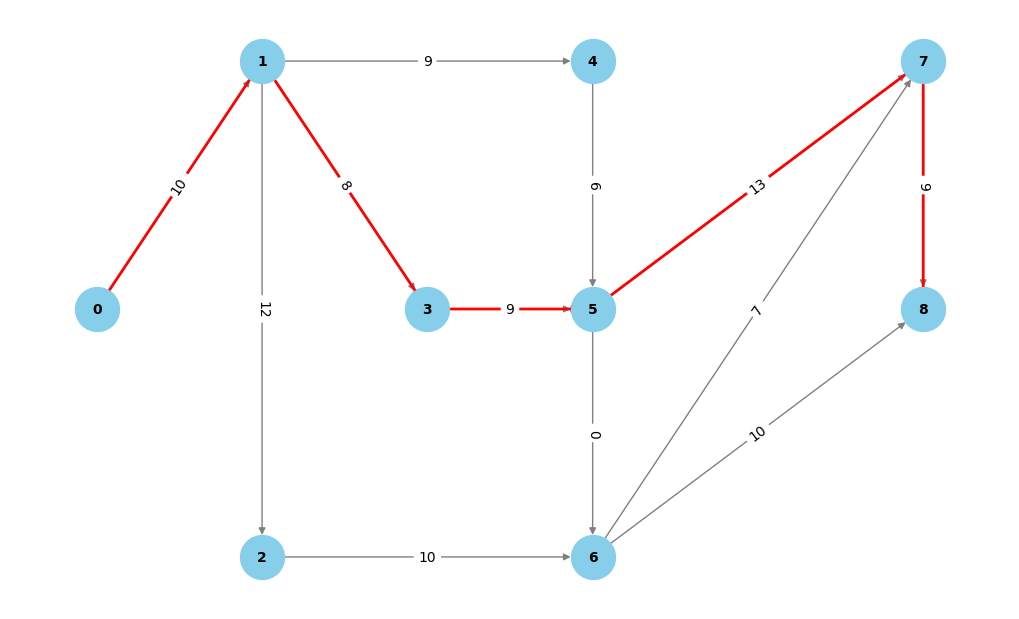

Минимальная стоимость проекта при заданном сроке выполнения: 57
Общая стоимость проекта: 337


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем пустой граф
G = nx.DiGraph()

# Позиции узлов
pos = {0:(10, 40), 1:(15, 50), 2:(15, 30), 3:(20, 40), 4:(25, 50), 5:(25, 40), 6:(25, 30), 7:(35, 50), 8:(35, 40)}

# Ребра с весами
edges = [
    (0, 1, 10),
    (1, 2, 12), (1, 3, 8), (1, 4, 9),
    (2, 6, 10),
    (3, 5, 9),
    (4, 5, 6),
    (5, 6, 0),
    (5, 7, 13),
    (6, 7, 7),
    (7, 8, 9),
    (6, 8, 10)
]

G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, 'weight')

# Расчет ранних дат (forward pass)
earliest_start = {node: 0 for node in G.nodes}
for node in nx.topological_sort(G):
    for successor in G.successors(node):
        earliest_start[successor] = max(earliest_start[successor], earliest_start[node] + G[node][successor]['weight'])

# Расчет поздних дат (backward pass)
latest_finish = {node: float('inf') for node in G.nodes}
latest_finish[max(G.nodes)] = earliest_start[max(G.nodes)]
for node in reversed(list(nx.topological_sort(G))):
    for predecessor in G.predecessors(node):
        latest_finish[predecessor] = min(latest_finish[predecessor], latest_finish[node] - G[predecessor][node]['weight'])

# Критический путь
critical_path = []
for node in G.nodes:
    if earliest_start[node] == latest_finish[node]:
        critical_path.append(node)

# Резервы времени
total_float = {}
free_float = {}
for u, v in G.edges:
    total_float[(u, v)] = latest_finish[v] - earliest_start[u] - G[u][v]['weight']
    free_float[(u, v)] = earliest_start[v] - earliest_start[u] - G[u][v]['weight']

# Вывод результатов
print("Наиболее ранние сроки наступления событий:", earliest_start)
print("Наиболее поздние сроки наступления событий:", {k: latest_finish[k] for k in sorted(latest_finish.keys(), reverse=True)})
print("Критический путь:", critical_path)
print("Полные резервы времени:", total_float)
print("Независимые резервы времени:", free_float)

# Коэффициенты напряженности
tension_coefficients = {edge: free_float[edge] / total_float[edge] if total_float[edge] != 0 else float('inf') for edge in total_float}

print("Коэффициенты напряженности некритических дуг:", {k: v for k, v in tension_coefficients.items() if v != float('inf')})

# Рисуем граф с выделением критического пути
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black', edge_color='gray', font_weight='bold')

# Рисуем ребра красным, если они принадлежат критическому пути
for u, v in G.edges:
    if u in critical_path and v in critical_path:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2.0, edge_color='red')

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

# Продолжительности работ
t_pes = {
    (0, 1): 10, (1, 2): 12, (1, 3): 8, (1, 4): 9,
    (2, 6): 10, (3, 5): 9, (4, 5): 6, (5, 7): 13,
    (6, 7): 7, (7, 8): 9, (6, 8): 10
}
t_opt = {
    (0, 1): 3, (1, 2): 4, (1, 3): 2, (1, 4): 4,
    (2, 6): 3, (3, 5): 3, (4, 5): 2, (5, 7): 4,
    (6, 7): 1, (7, 8): 2, (6, 8): 4
}

# Стоимость сокращения
costs = {
    (0, 1): 5, (1, 2): 3, (1, 3): 8, (1, 4): 3,
    (2, 6): 6, (3, 5): 2, (4, 5): 6, (5, 7): 9,
    (6, 7): 4, (7, 8): 3, (6, 8): 8
}

# Максимальное сокращение
max_reduction = {edge: t_pes[edge] - t_opt[edge] for edge in t_pes}

# Заданный срок выполнения проекта
T_dir = 28

# Заданная надежность
gamma = 0.90

# Стоимость одного дня проекта
S = 10

# Сортировка работ по стоимости сокращения
sorted_edges = sorted(t_pes.keys(), key=lambda edge: costs[edge])

# Минимизация стоимости при заданном сроке выполнения
total_cost = 0
current_duration = earliest_start[max(G.nodes)]

while current_duration > T_dir:
    for edge in sorted_edges:
        if edge[0] in critical_path and edge[1] in critical_path and max_reduction[edge] > 0:
            reduction = min(max_reduction[edge], current_duration - T_dir)
            total_cost += costs[edge] * reduction
            current_duration -= reduction
            max_reduction[edge] -= reduction
            # Обновляем продолжительность работы на графе
            G[edge[0]][edge[1]]['weight'] -= reduction
            # Пересчитываем ранние и поздние сроки
            earliest_start = {node: 0 for node in G.nodes}
            for node in nx.topological_sort(G):
                for successor in G.successors(node):
                    earliest_start[successor] = max(earliest_start[successor], earliest_start[node] + G[node][successor]['weight'])
            latest_finish = {node: float('inf') for node in G.nodes}
            latest_finish[max(G.nodes)] = earliest_start[max(G.nodes)]
            for node in reversed(list(nx.topological_sort(G))):
                for predecessor in G.predecessors(node):
                    latest_finish[predecessor] = min(latest_finish[predecessor], latest_finish[node] - G[predecessor][node]['weight'])
            critical_path = []
            for node in G.nodes:
                if earliest_start[node] == latest_finish[node]:
                    critical_path.append(node)
            break

# Учет надежности
# Здесь предполагается, что надежность проекта не снижается ниже заданного уровня
# Это можно реализовать, если есть данные о надежности каждой работы
print("Минимальная стоимость проекта при заданном сроке выполнения:", total_cost)
print("Общая стоимость проекта:", total_cost + S * T_dir)

Минимальная стоимость проекта при заданном сроке выполнения: 57
Общая стоимость проекта: 337


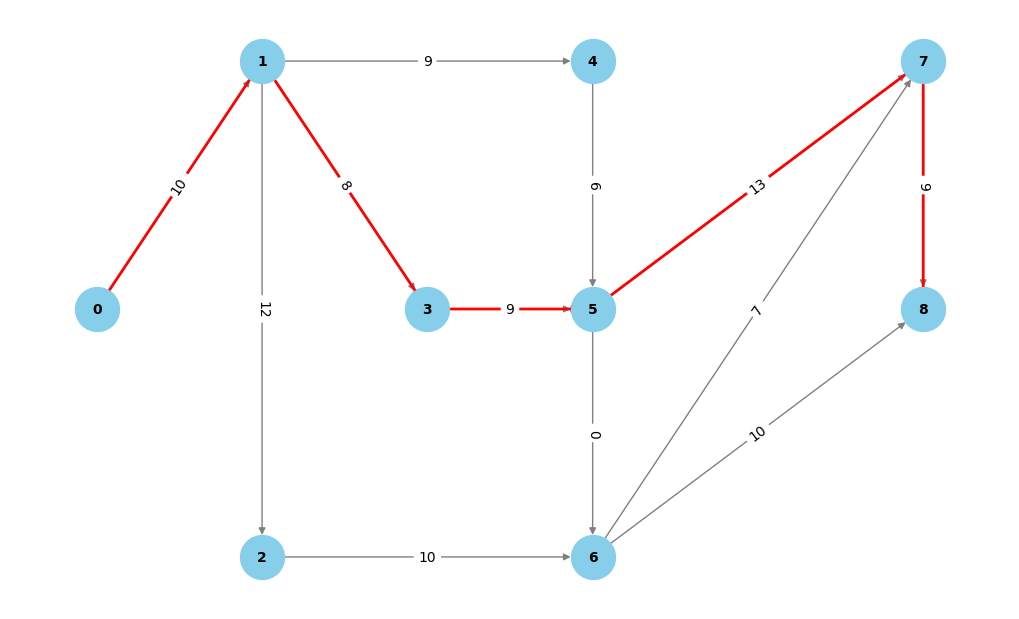

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем пустой граф
G = nx.DiGraph()

# Позиции узлов
pos = {0:(10, 40), 1:(15, 50), 2:(15, 30), 3:(20, 40), 4:(25, 50), 5:(25, 40), 6:(25, 30), 7:(35, 50), 8:(35, 40)}

# Ребра с весами
edges = [
    (0, 1, 10),
    (1, 2, 12), (1, 3, 8), (1, 4, 9),
    (2, 6, 10),
    (3, 5, 9),
    (4, 5, 6),
    (5, 6, 0),
    (5, 7, 13),
    (6, 7, 7),
    (7, 8, 9),
    (6, 8, 10)
]

G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, 'weight')

# Продолжительности работ
t_pes = {
    (0, 1): 10, (1, 2): 12, (1, 3): 8, (1, 4): 9,
    (2, 6): 10, (3, 5): 9, (4, 5): 6, (5, 7): 13,
    (6, 7): 7, (7, 8): 9, (6, 8): 10
}
t_opt = {
    (0, 1): 3, (1, 2): 4, (1, 3): 2, (1, 4): 4,
    (2, 6): 3, (3, 5): 3, (4, 5): 2, (5, 7): 4,
    (6, 7): 1, (7, 8): 2, (6, 8): 4
}

# Стоимость сокращения
costs = {
    (0, 1): 5, (1, 2): 3, (1, 3): 8, (1, 4): 3,
    (2, 6): 6, (3, 5): 2, (4, 5): 6, (5, 7): 9,
    (6, 7): 4, (7, 8): 3, (6, 8): 8
}

# Максимальное сокращение
max_reduction = {edge: t_pes[edge] - t_opt[edge] for edge in t_pes}

# Заданный срок выполнения проекта
T_dir = 28

# Заданная надежность
gamma = 0.90

# Стоимость одного дня проекта
S = 10

# Функция для расчета ранних и поздних сроков
def calculate_earliest_start(G):
    earliest_start = {node: 0 for node in G.nodes}
    for node in nx.topological_sort(G):
        for successor in G.successors(node):
            earliest_start[successor] = max(earliest_start[successor], earliest_start[node] + G[node][successor]['weight'])
    return earliest_start

def calculate_latest_finish(G, earliest_start):
    latest_finish = {node: float('inf') for node in G.nodes}
    latest_finish[max(G.nodes)] = earliest_start[max(G.nodes)]
    for node in reversed(list(nx.topological_sort(G))):
        for predecessor in G.predecessors(node):
            latest_finish[predecessor] = min(latest_finish[predecessor], latest_finish[node] - G[predecessor][node]['weight'])
    return latest_finish

# Функция для определения критического пути
def find_critical_path(G, earliest_start, latest_finish):
    critical_path = []
    for node in G.nodes:
        if earliest_start[node] == latest_finish[node]:
            critical_path.append(node)
    return critical_path

# Минимизация стоимости при заданном сроке выполнения
total_cost = 0
current_duration = calculate_earliest_start(G)[max(G.nodes)]

while current_duration > T_dir:
    earliest_start = calculate_earliest_start(G)
    latest_finish = calculate_latest_finish(G, earliest_start)
    critical_path = find_critical_path(G, earliest_start, latest_finish)

    # Сортировка работ по стоимости сокращения
    sorted_edges = sorted([edge for edge in t_pes.keys() if edge[0] in critical_path and edge[1] in critical_path], key=lambda edge: costs[edge])

    for edge in sorted_edges:
        if max_reduction[edge] > 0:
            reduction = min(max_reduction[edge], current_duration - T_dir)
            total_cost += costs[edge] * reduction
            current_duration -= reduction
            max_reduction[edge] -= reduction
            # Обновляем продолжительность работы на графе
            G[edge[0]][edge[1]]['weight'] -= reduction
            break

# Учет надежности
# Здесь предполагается, что надежность проекта не снижается ниже заданного уровня
# Это можно реализовать, если есть данные о надежности каждой работы

print("Минимальная стоимость проекта при заданном сроке выполнения:", total_cost)
print("Общая стоимость проекта:", total_cost + S * T_dir)

# Рисуем граф с выделением критического пути
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black', edge_color='gray', font_weight='bold')

# Рисуем ребра красным, если они принадлежат критическому пути
for u, v in G.edges:
    if u in critical_path and v in critical_path:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2.0, edge_color='red')

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()